# Zetasizer data analysis - particel size distribution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import os
from datetime import datetime

In [2]:
def percentile(df, p=50, y="size", x="volume_cum"):
    stop = 0
    for row in df[x]:
        if stop == 0:
            if row >= p and stop == 0:
                stop = 1
                ind = df.loc[df[x] == row].index[0]
                delta_y = df[y].iloc[[ind]].values - df[y].iloc[[ind - 1]].values
                delta_x = df[x].iloc[[ind]].values - df[x].iloc[[ind - 1]].values
                y_1 = df[y].iloc[[ind - 1]].values
                x_1 = df[x].iloc[[ind - 1]].values
                size_percentile = delta_y * (p - x_1) / delta_x + y_1
    try:
        return size_percentile
    except:
        print("nije prošlo ", file)


def describe_dist(df, perc=[10, 50, 90, 98], path=os.getcwd()):
    df_res = pd.DataFrame()
    for m in perc:
        df_res["D" + str(m)] = percentile(df, p=m)
    try:
        df_res["Span(D90-D10)/D50"] = (df_res["D90"] - df_res["D10"]) / df_res["D50"]
    except:
        print("span can not be calculated")
    df_res["name"] = file
    os.chdir("../")
    os.chdir("results")
    # df_res.to_csv(file + '_RESULTS.csv', sep=';', decimal=',')
    os.chdir("../")
    os.chdir("data")
    return df_res

Imput the file name:

In [3]:
# Current working directory
path = os.chdir("data")
path = os.getcwd()

# Files in CWD
directory = os.listdir(path)

In [4]:
os.path.abspath(os.path.join(path, os.pardir))

df_all = pd.DataFrame(["D10", "D50", "D90", "D98", "Span(D90-D10)/D50", "name"])
dt = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

for f_ind, file in enumerate(directory):
    if file[-4:] == ".txt":
        if f_ind == 0:
            df = pd.read_csv(
                file, names=["size", "volume"], sep="\t", decimal=",", skiprows=[0, -1]
            )

            df.dropna(axis=0, inplace=True)
            df["volume_cum"] = df["volume"].cumsum(axis=0)
            df["volume_cum"] = 100 * df["volume_cum"] / df["volume_cum"].max()
            df_all = describe_dist(df)
        else:
            df = pd.read_csv(
                file, names=["size", "volume"], sep="\t", decimal=",", skiprows=[0, -1]
            )
            df.dropna(axis=0, inplace=True)
            df["volume_cum"] = df["volume"].cumsum(axis=0)
            df["volume_cum"] = 100 * df["volume_cum"] / df["volume_cum"].max()
            df_one = describe_dist(df)
            df_all = df_all.append(df_one)

os.chdir("../")
os.chdir("results")
df_all.to_csv(str(dt) + "_RESULTS.csv", sep=";", decimal=",")
os.chdir("../")

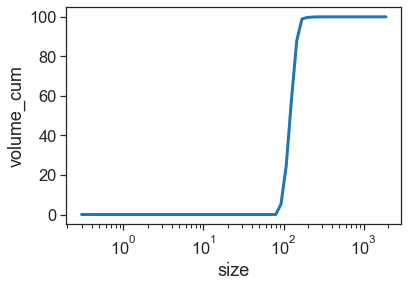

In [5]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

g = sns.lineplot(x="size", y="volume_cum", data=df)
g.set_xscale("log")

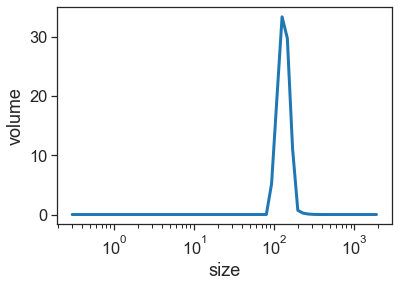

In [6]:
g = sns.lineplot(x="size", y="volume", data=df)

g.set_xscale("log")